# Martha Morrissey Lab 1: Bike Share Data 

In [1]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4
import warnings
warnings.filterwarnings("ignore")


## Loading Data into Jupyter Notebook

## Boulder B Cycle Data

B Cycle data courtsey of Amy DeCastro. The data spans between May 20, 2011 and July 31, 2016. [Boulder B Cycle](https://boulder.bcycle.com/) is a bike share program in Boulder with 40 stations and 300 bikes. It contains information trip duration, date, day of the week, starting station and ending location for Boulder Bcycle bike trips and if the rider is a 24-hour user or an annual subscriber. 

In [2]:
b_cycle = pd.read_csv('/Users/marthamorrissey/Desktop/BoulderBCycle.csv')
b_cycle.rename(columns={b_cycle.columns[4] : 'day_month_year',},inplace=True)
b_cycle.head()

,Rider Home System,Rider or Operator Number,Entry Pass Type,Bike Number,day_month_year,Checkout Day of Week,Checkout Time,Checkout Station,Return Date,Return Day of Week,Return Time,Return Station,Trip Duration (Minutes)
0,Boulder B-cycle,R1011535,24-hour,548,5/20/11,Friday,9:24:00 AM,15th & Pearl,5/20/11,Friday,9:40:00 AM,26th @ Pearl,16
1,Boulder B-cycle,R1011722,24-hour,742,5/20/11,Friday,9:24:00 AM,15th & Pearl,5/20/11,Friday,9:54:00 AM,15th & Pearl,30
2,Boulder B-cycle,R1008367,Annual,578,5/20/11,Friday,9:33:00 AM,Broadway & Alpine,5/20/11,Friday,9:36:00 AM,Broadway & Alpine,3
3,Boulder B-cycle,R1010650,24-hour,616,5/20/11,Friday,9:34:00 AM,Broadway & Alpine,5/20/11,Friday,9:37:00 AM,Broadway & Alpine,3
4,Boulder B-cycle,R1008367,Annual,578,5/20/11,Friday,9:36:00 AM,Broadway & Alpine,5/20/11,Friday,9:39:00 AM,Broadway & Alpine,3


## Boulder Weather Data 

In [3]:
!wget -P files http://140.172.12.69:80/psd/boulder/data/boulderdaily.complete

--2016-10-03 11:53:23--  http://140.172.12.69/psd/boulder/data/boulderdaily.complete
Connecting to 140.172.12.69:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2146642 (2.0M) [text/plain]
Saving to: 'files/boulderdaily.complete.10'

boulderdaily.comple 100%[=====================>]   2.05M   765KB/s   in 2.7s   

2016-10-03 11:53:25 (765 KB/s) - 'files/boulderdaily.complete.10' saved [2146642/2146642]



Code from Lecture 2c, and data from NOAA/ESRL. The data contains daily temperature maxes, minimums in degrees F from 1897 to 2016. It also has percipitation, snowfall and snowcover level columns. 

In [4]:
cols = ["year", "month", "day", "tmax", "tmin", "precip", "snow", "snowcover"]
no_headers = pd.read_csv("files/boulderdaily.complete", sep='\s+', header=None,
                         names=cols, skiprows=1, skipfooter=14, engine='python',
                         na_values=["-998", "-998.00", "-999.00"])
no_headers.head()

,year,month,day,tmax,tmin,precip,snow,snowcover
0,1897,1,1,NaN,NaN,NaN,NaN,NaN
1,1897,1,2,NaN,NaN,NaN,NaN,NaN
2,1897,1,3,NaN,NaN,NaN,NaN,NaN
3,1897,1,4,NaN,NaN,NaN,NaN,NaN
4,1897,1,5,NaN,NaN,NaN,NaN,NaN


In [5]:
bike_share_temps = no_headers[no_headers.year > 2010]

bike_share_temps.head()

,year,month,day,tmax,tmin,precip,snow,snowcover
41724,2011,1,1,25.0,1.0,0.0,0.0,4.0
41725,2011,1,2,47.0,1.0,0.0,0.0,3.0
41726,2011,1,3,36.0,16.0,0.0,0.0,3.0
41727,2011,1,4,44.0,10.0,0.0,0.0,2.0
41728,2011,1,5,49.0,31.0,0.0,0.0,2.0


## Tidying Time (literally) and Date

In [6]:
formatted = pd.to_datetime(bike_share_temps[['day', 'month', 'year']], errors = 'coerce')
bike_share_temps.loc[:,'formatted'] = formatted
bike_share_temps2 = bike_share_temps[['tmax', 'tmin', 'precip', 'snow', 'snowcover','formatted']]
bike_share_temps2.head()

,tmax,tmin,precip,snow,snowcover,formatted
41724,25.0,1.0,0.0,0.0,4.0,2011-01-01
41725,47.0,1.0,0.0,0.0,3.0,2011-01-02
41726,36.0,16.0,0.0,0.0,3.0,2011-01-03
41727,44.0,10.0,0.0,0.0,2.0,2011-01-04
41728,49.0,31.0,0.0,0.0,2.0,2011-01-05


In [7]:
def change(x):
    return np.datetime64(pd.datetime.strptime(x, '%m/%d/%y'))

b_cycle['formatted'] = b_cycle['day_month_year'].map(change)
b_cycle.head()

,Rider Home System,Rider or Operator Number,Entry Pass Type,Bike Number,day_month_year,Checkout Day of Week,Checkout Time,Checkout Station,Return Date,Return Day of Week,Return Time,Return Station,Trip Duration (Minutes),formatted
0,Boulder B-cycle,R1011535,24-hour,548,5/20/11,Friday,9:24:00 AM,15th & Pearl,5/20/11,Friday,9:40:00 AM,26th @ Pearl,16,2011-05-20
1,Boulder B-cycle,R1011722,24-hour,742,5/20/11,Friday,9:24:00 AM,15th & Pearl,5/20/11,Friday,9:54:00 AM,15th & Pearl,30,2011-05-20
2,Boulder B-cycle,R1008367,Annual,578,5/20/11,Friday,9:33:00 AM,Broadway & Alpine,5/20/11,Friday,9:36:00 AM,Broadway & Alpine,3,2011-05-20
3,Boulder B-cycle,R1010650,24-hour,616,5/20/11,Friday,9:34:00 AM,Broadway & Alpine,5/20/11,Friday,9:37:00 AM,Broadway & Alpine,3,2011-05-20
4,Boulder B-cycle,R1008367,Annual,578,5/20/11,Friday,9:36:00 AM,Broadway & Alpine,5/20/11,Friday,9:39:00 AM,Broadway & Alpine,3,2011-05-20


In [8]:
start_date = bike_share_temps[bike_share_temps.formatted > np.datetime64('2011-05-19')]
correct_date = start_date[start_date.formatted < np.datetime64('2016-08-01')]

correct_date.head()

,year,month,day,tmax,tmin,precip,snow,snowcover,formatted
41864,2011,5,20,61.0,34.0,0.52,0.0,0.0,2011-05-20
41865,2011,5,21,61.0,34.0,NaN,0.0,0.0,2011-05-21
41866,2011,5,22,77.0,50.0,0.00,0.0,0.0,2011-05-22
41867,2011,5,23,73.0,48.0,0.01,0.0,0.0,2011-05-23
41868,2011,5,24,62.0,42.0,0.50,0.0,0.0,2011-05-24


With the code above, I sliced the bike_share_temps data frame to only include the dates that matched the Boulder B Cyle data so the two tables could be joined.

## Grouping 

Currently, the b_cycle table has a column for each unique trip on a given day. I want to aggregate the data, and group by date to determine the total number of trips that started on the same day. 

In [9]:
test = pd.DataFrame({'count' : b_cycle.groupby( ["formatted"] ).size()}).reset_index()
test.head()

,formatted,count
0,2011-05-20,307
1,2011-05-21,171
2,2011-05-22,124
3,2011-05-23,181
4,2011-05-24,40


## Joined Tables

In [10]:
joined = pd.merge(correct_date, b_cycle, on='formatted', how='outer')
joined.head()

joined2 = pd.merge(correct_date, test, on='formatted', how='outer')
joined2.head()


,year,month,day,tmax,tmin,precip,snow,snowcover,formatted,count
0,2011,5,20,61.0,34.0,0.52,0.0,0.0,2011-05-20,307.0
1,2011,5,21,61.0,34.0,NaN,0.0,0.0,2011-05-21,171.0
2,2011,5,22,77.0,50.0,0.00,0.0,0.0,2011-05-22,124.0
3,2011,5,23,73.0,48.0,0.01,0.0,0.0,2011-05-23,181.0
4,2011,5,24,62.0,42.0,0.50,0.0,0.0,2011-05-24,40.0


## Plot

In [11]:
bcycletrips_date = joined2[['formatted', 'count']]
bcycletrips_date.head()
bcycletrips_date['dt'] = bcycletrips_date['formatted'].astype(pd.datetime)



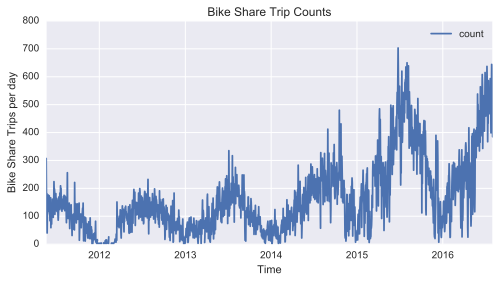

In [12]:
graph_df = bcycletrips_date[['dt', 'count']]

c = graph_df.set_index(['dt'])
plot1 = c.plot()
plot1.set_xlabel("Time")
plot1.set_ylabel("Bike Share Trips per day")
plot1.set_title("Bike Share Trip Counts")

The graph above, Bike Share Trip Counts, shows that over the years use of Boulder's BCycle system has increased, and usage cycles seasonally. In the future, the seasonal patterns in this data should be explored via correlations and seasonal decomposition should be visualized. 

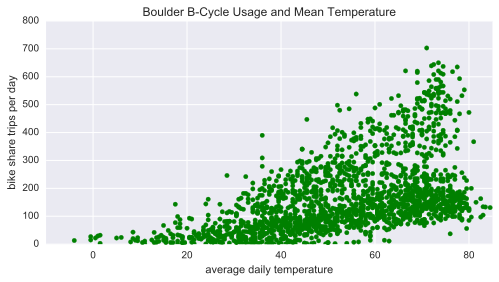

In [13]:
joined2['mean'] = (joined2['tmax'] + joined2['tmin'])/2
joined2.head()

plt.scatter(joined2['mean'], joined2['count'], color = 'green')
plt.ylabel('bike share trips per day')
plt.ylim([0,800])
plt.xlabel('average daily temperature')
plt.xlim([-10,85])
plt.title('Boulder B-Cycle Usage and Mean Temperature')

The graph above, Boulder B-Cycle Usage and Mean Temperature, shows that generally as mean  temperature increases, bike share usage increases. At around 50 degrees, it looks like the data splits into two different groups, with usage increasing in both but more steeply in one of this groups. This could be explained by an increase of "causal" riders who use the bikes more as the weather gets warmer, while usage among annual members remains more consistant, but still increases with average temperature. This will be investigated in later analysis. 

## Equation 

$a^2 + b^2 = c^2$ 
Perhpas some of the Boulder Bcycle users considered pythagorean theorem, $a^2 + b^2 = c^2$,  when planning their routes. 